<a href="https://colab.research.google.com/github/Akshithkumarreddy/Machine_learning_AL/blob/main/05_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent for Logistic Regression

In this notebook, we'll explore how **Gradient Descent** can be used to train a **Logistic Regression** model.

We will:
- Generate a binary classification dataset
- Implement logistic regression from scratch using gradient descent
- Visualize decision boundaries and training loss

## Step 1: Import libraries and create dataset

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Generate binary classification dataset
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           class_sep=1.5, random_state=42)

# Add bias term to features
X_b = np.c_[np.ones((X.shape[0], 1)), X]
y = y.reshape(-1, 1)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.3, random_state=42)


## Step 2: Train Logistic Regression and plot its loss

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [ ]:
# Logistic Regression with Gradient Descent
def logistic_regression_gd(X, y, lr=0.1, n_iter=100):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    loss_history = []

    for i in range(n_iter):
        z = X.dot(theta)
        h = sigmoid(z)
        gradient = X.T.dot(h - y) / m
        theta -= lr * gradient
        loss = -np.mean(y * np.log(h + 1e-8) + (1 - y) * np.log(1 - h + 1e-8))
        loss_history.append(loss)

    return theta, loss_history

theta, loss_history = logistic_regression_gd(X_train, y_train, lr=0.1, n_iter=100)
print("Final parameters:", theta.ravel())


Final parameters: [-0.31492558  0.33956802  2.11750253]


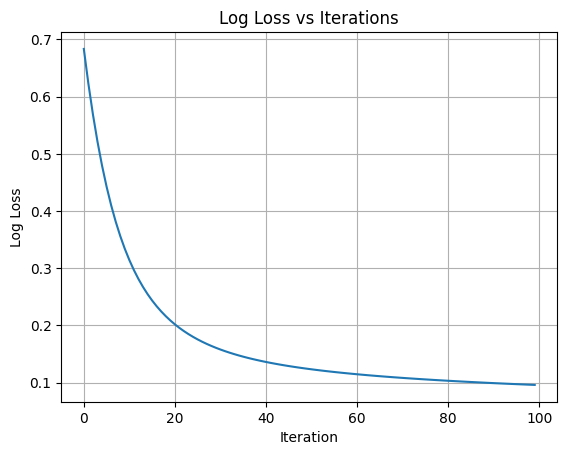

In [ ]:
# Plot loss over iterations
plt.plot(loss_history)
plt.title("Log Loss vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.grid(True)
plt.show()


## Step 3: Evaluate logistic regression classifier

In [ ]:
# Predictions and evaluation
def predict(X, theta):
    return (sigmoid(X.dot(theta)) >= 0.5).astype(int)

y_pred = predict(X_test, theta)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9888888888888889

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.98      1.00      0.99        44

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



## Step 4: Visualize the decision boundary

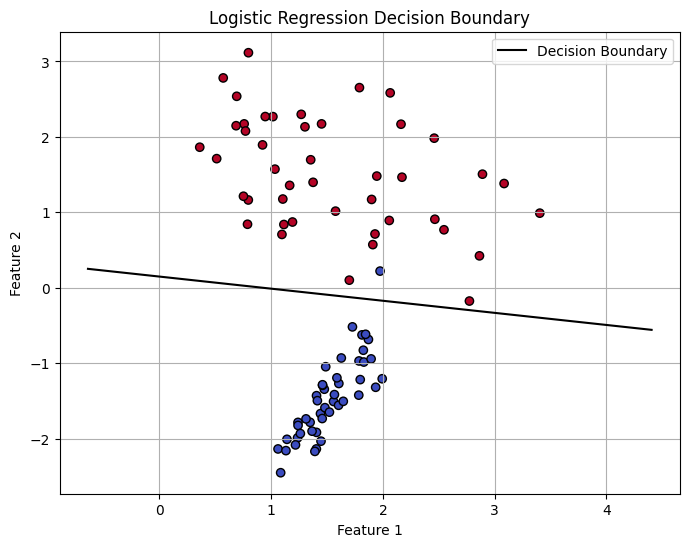

In [ ]:
# Visualize decision boundary
def plot_decision_boundary(X, y, theta):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 1], X[:, 2], c=y.ravel(), cmap=plt.cm.coolwarm, edgecolors='k')
    x_values = [np.min(X[:, 1] - 1), np.max(X[:, 1] + 1)]
    y_values = -(theta[0] + theta[1] * x_values[0]) / theta[2], -(theta[0] + theta[1] * x_values[1]) / theta[2]
    plt.plot(x_values, y_values, label='Decision Boundary', color='black')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Logistic Regression Decision Boundary")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(X_test, y_test, theta)


# **Questions**

- How does changing the learning rate (`lr`) affect the convergence?
- What happens when you increase or decrease the number of iterations?
- Can you identify cases where logistic regression fails to converge well?
